## Experiment 1: Working with Python packages-Numpy, Scipy, Scikit-Learn, Matplotlib

R Padmashri   
3122 23 5001 093  
CSE - B

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import os
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\padma\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### LOAN APPROVAL DATASET

In [2]:
loan_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/loan_approval_dataset.csv")

# Clean column names
loan_df.columns = loan_df.columns.str.strip()

loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loan_df.info()
print(loan_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
(4269, 13)


In [4]:
loan_df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [5]:
for col in loan_df.columns:
    if loan_df[col].dtype == 'object':
        loan_df[col] = loan_df[col].fillna(loan_df[col].mode()[0])
    else:
        loan_df[col] = loan_df[col].fillna(loan_df[col].mean())

#### Features Analysis

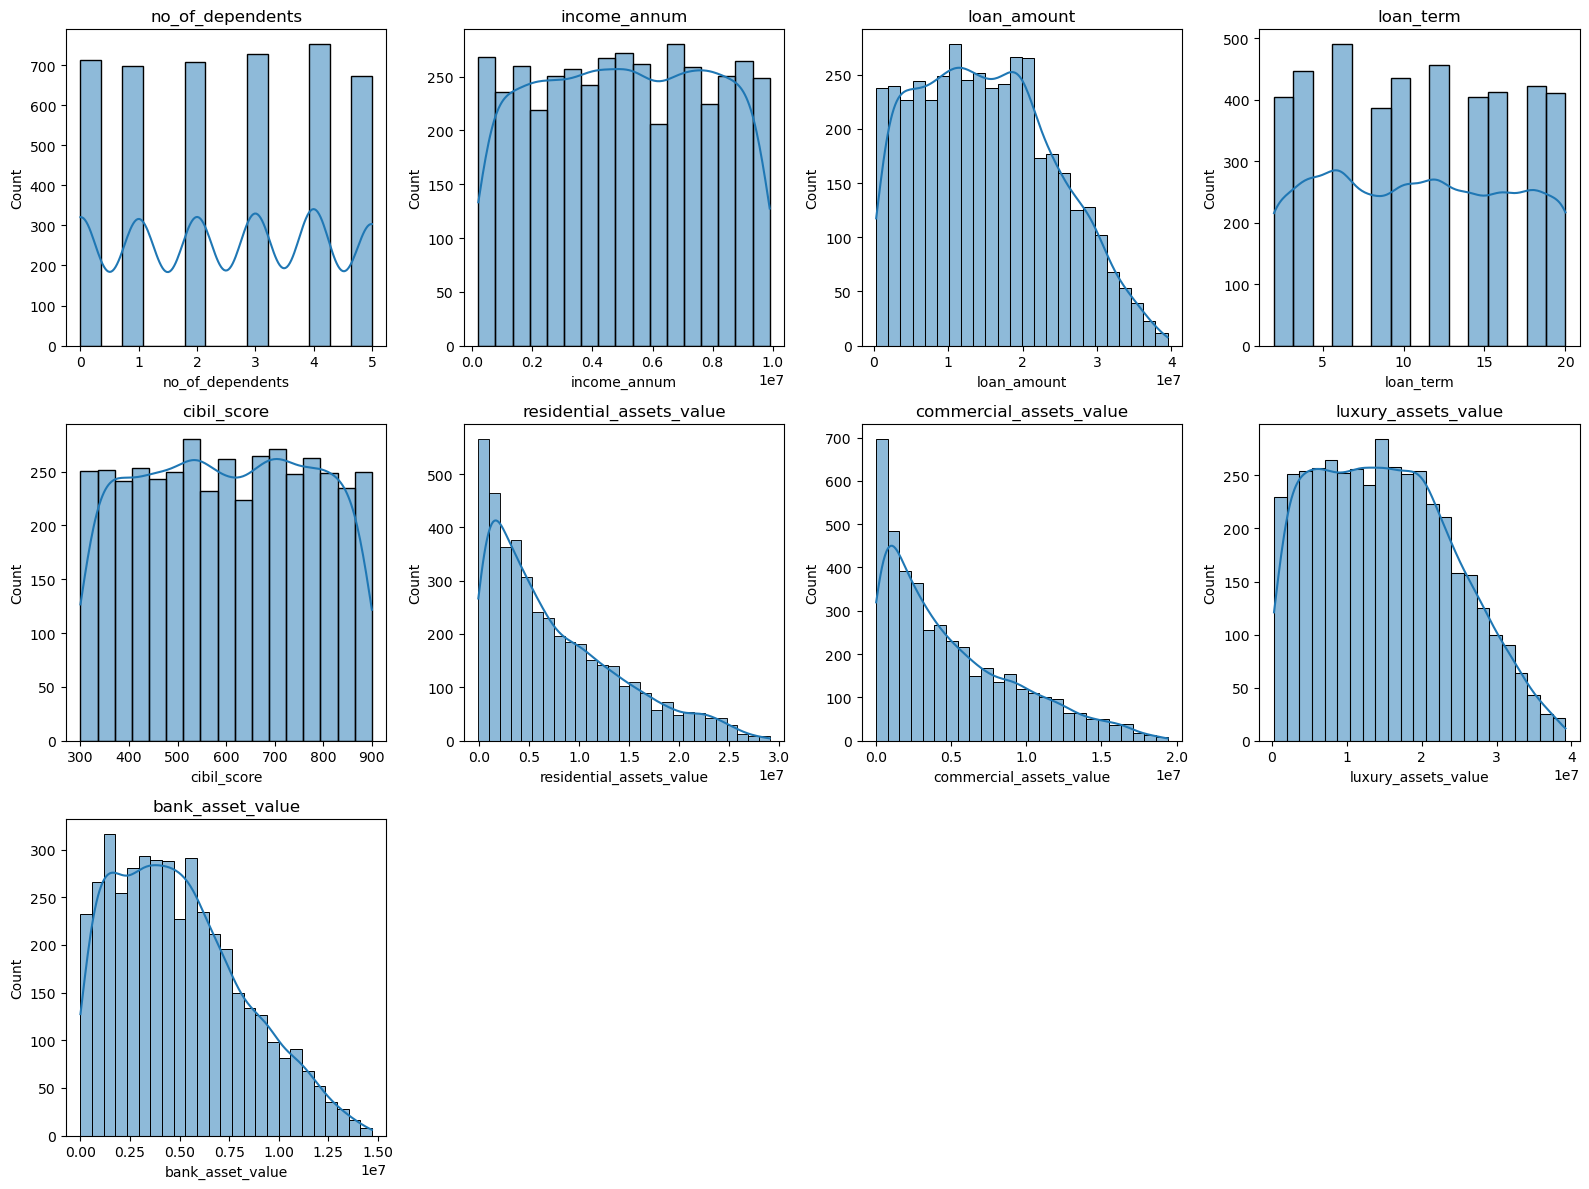

In [6]:
num_cols = [
    col for col in loan_df.select_dtypes(include="number").columns
    if col != "loan_id"
]

rows = (len(num_cols) + 3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(loan_df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove empty subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


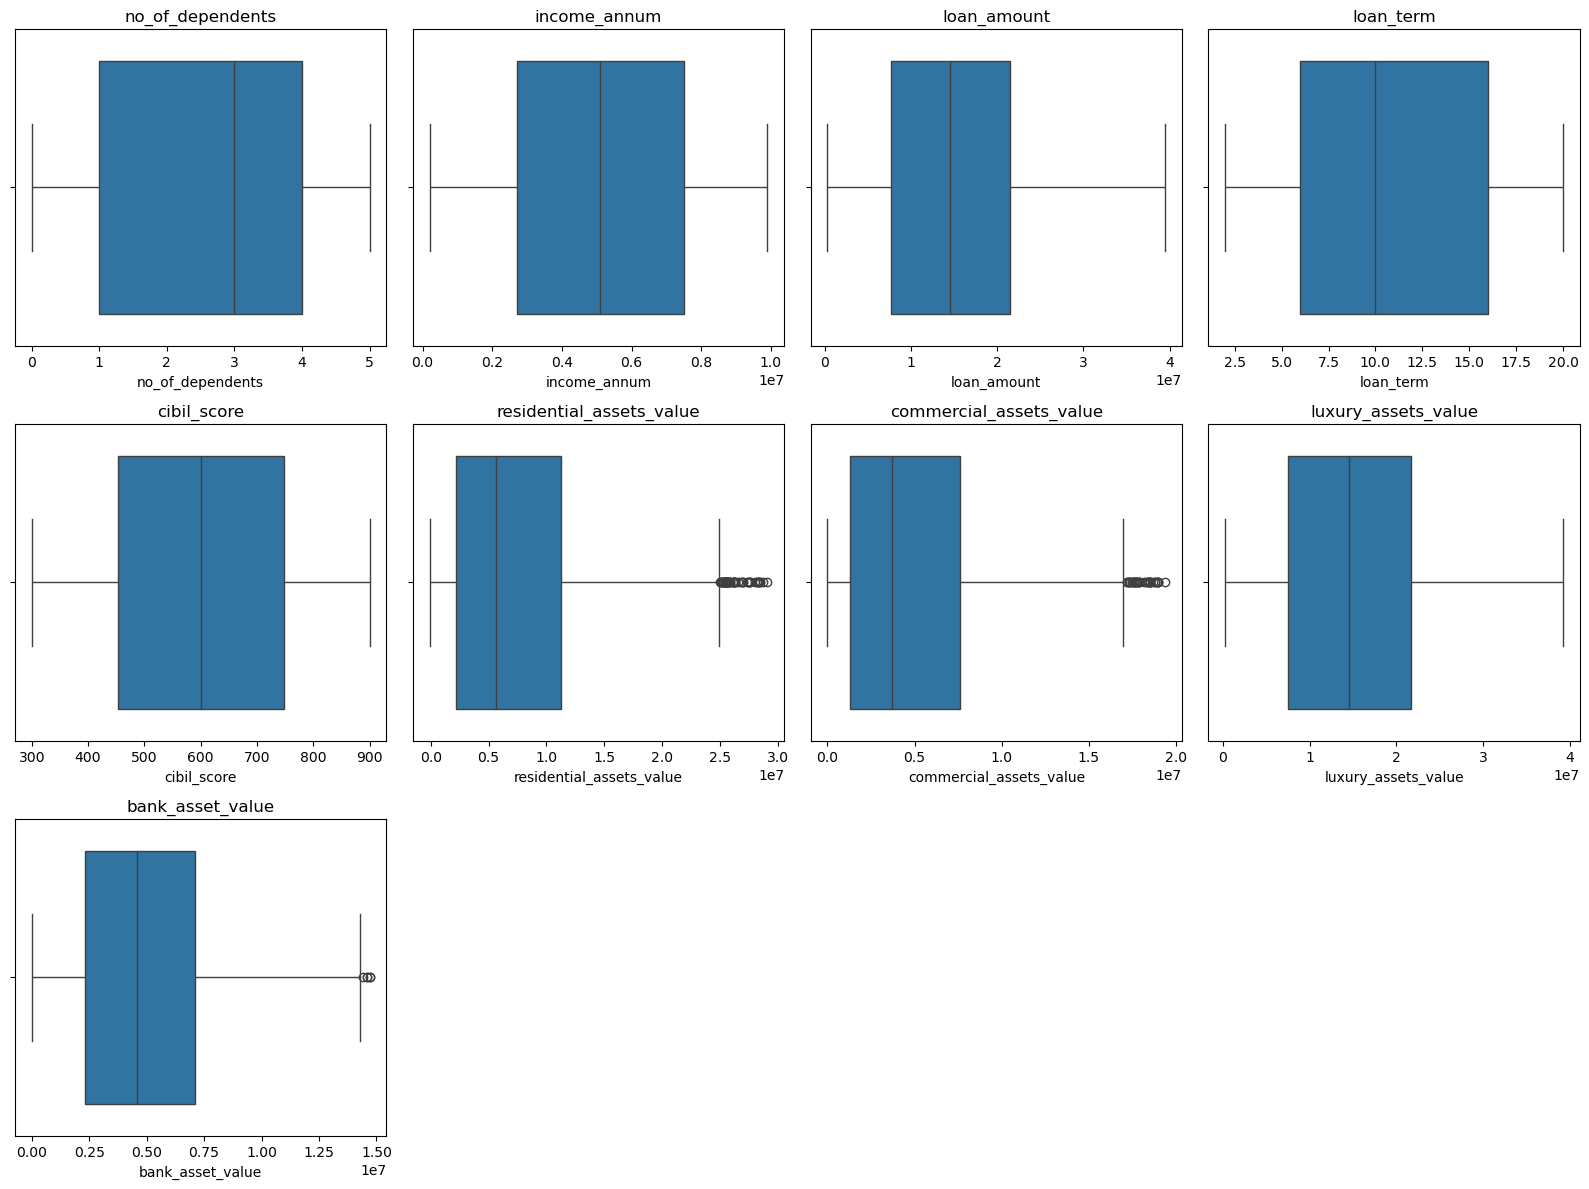

In [7]:
num_cols = [
    col for col in loan_df.select_dtypes(include="number").columns
    if col != "loan_id"
]

rows = (len(num_cols) + 3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=loan_df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
le = LabelEncoder()
for col in loan_df.columns:
    if loan_df[col].dtype == "object":
        loan_df[col] = le.fit_transform(loan_df[col])

In [9]:
X = loan_df.drop("loan_status", axis=1)
y = loan_df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
selected_features


Index(['loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value'],
      dtype='object')

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])


In [12]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9250585480093677

Confusion Matrix:
 [[508  23]
 [ 41 282]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       531
           1       0.92      0.87      0.90       323

    accuracy                           0.93       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.93      0.93      0.92       854



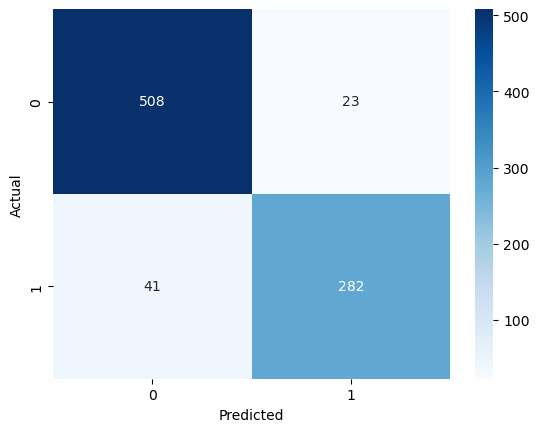

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### IRIS DATASET

In [15]:
iris_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/Iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
print(iris_df.shape)
print(iris_df.info())
print(iris_df.describe())
print(iris_df.isna().sum())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

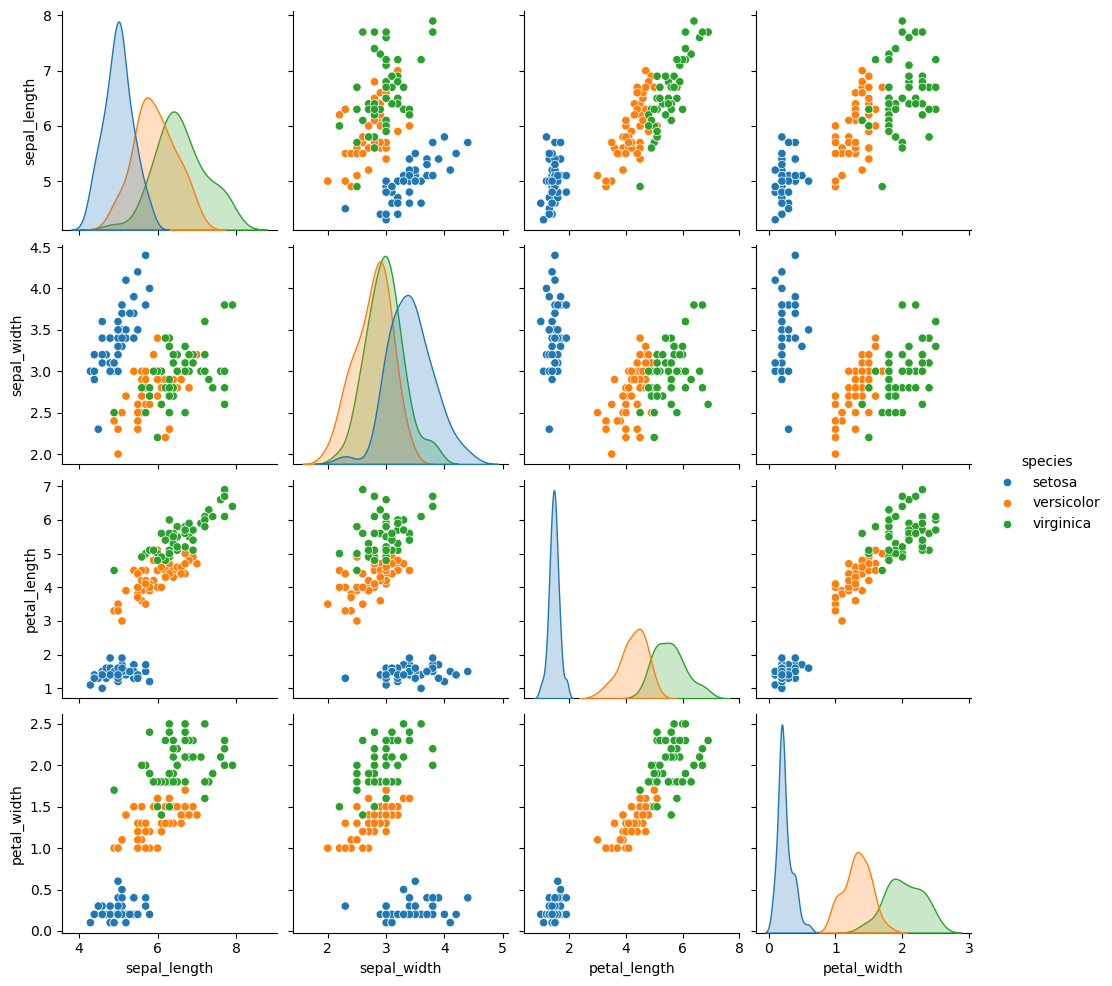

In [17]:
sns.pairplot(iris_df, hue="species")
plt.show()

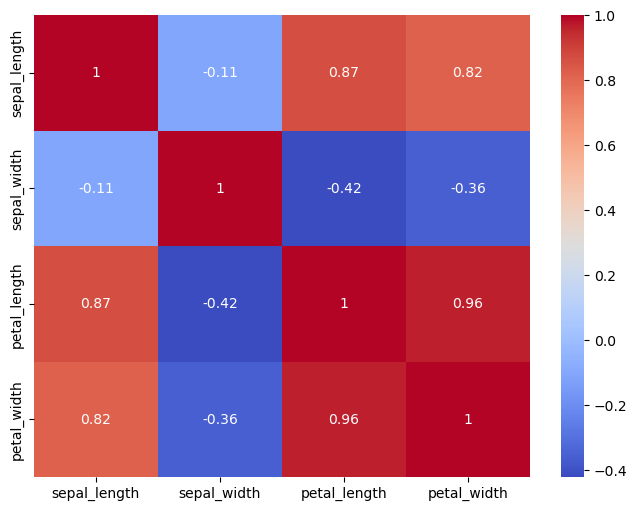

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(
    iris_df.select_dtypes(include='number').corr(),
    annot=True,
    cmap="coolwarm"
)
plt.show()

In [19]:
le = LabelEncoder()
iris_df["species"] = le.fit_transform(iris_df["species"])
X = iris_df.drop("species", axis=1)
y = iris_df["species"]


In [20]:
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features],
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



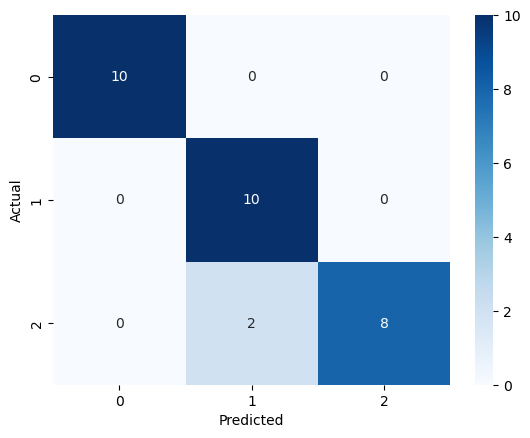

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### DIABETES DATASET

In [26]:
dia_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/diabetes_prediction_dataset.csv")
dia_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [27]:
print(dia_df.shape)
dia_df.info()
print(dia_df.describe())
print(dia_df.isna().sum())

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593   

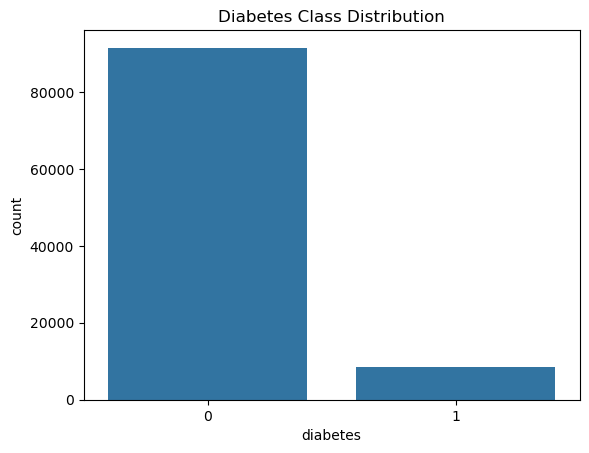

In [28]:
sns.countplot(x="diabetes", data=dia_df)
plt.title("Diabetes Class Distribution")
plt.show()

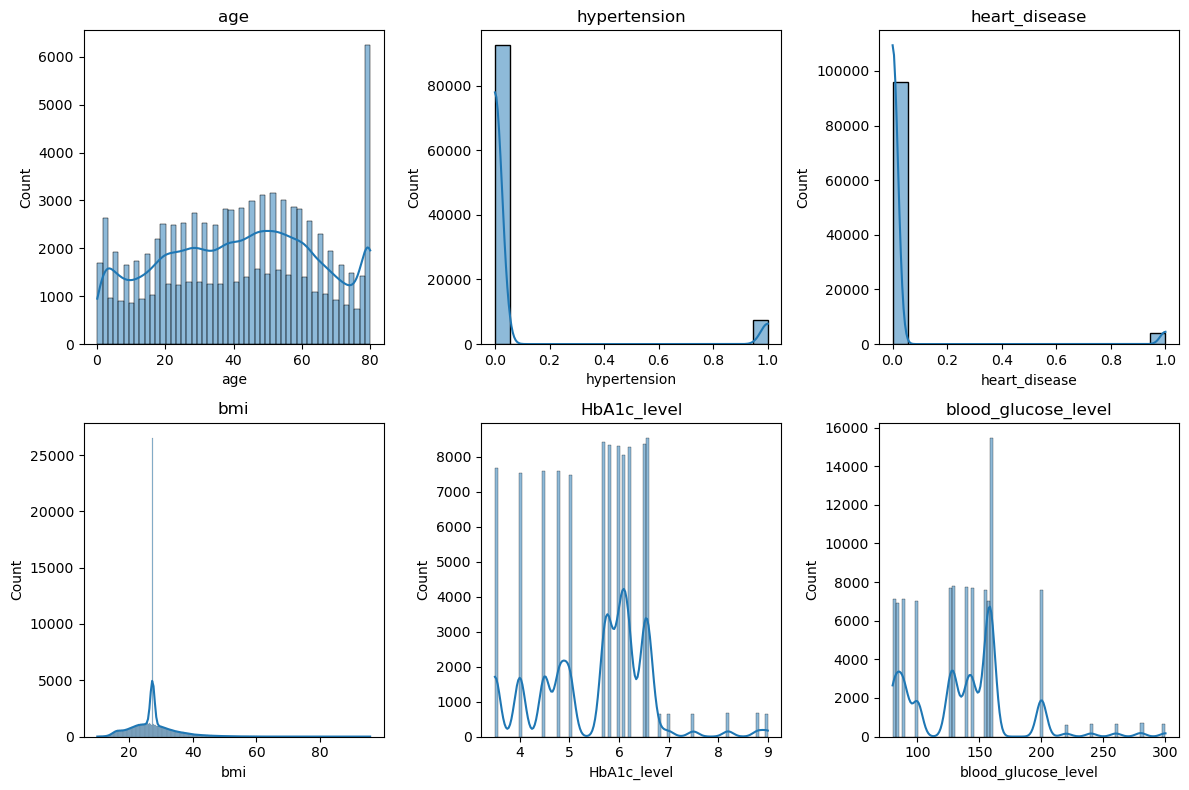

In [29]:
num_cols = dia_df.select_dtypes(include="number").columns.tolist()
num_cols.remove("diabetes")


n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(dia_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

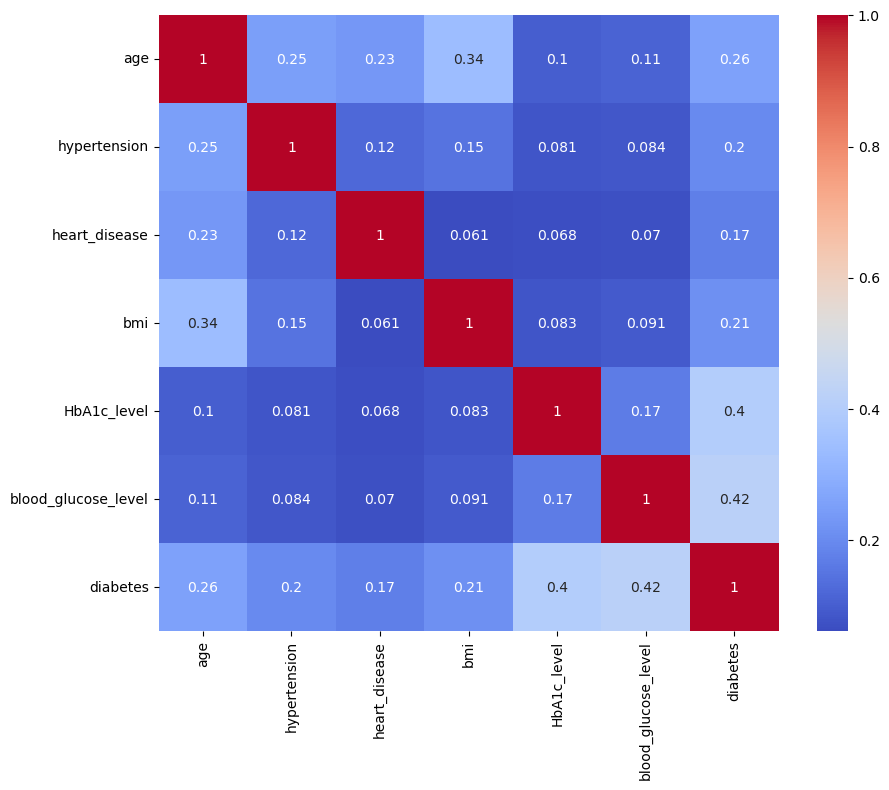

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(dia_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

for col in dia_df.columns:
    if dia_df[col].dtype == "object":
        dia_df[col] = dia_df[col].fillna(dia_df[col].mode()[0])
    else:
        dia_df[col] = dia_df[col].fillna(dia_df[col].mean())

In [31]:
le = LabelEncoder()
for col in dia_df.select_dtypes(include="object").columns:
    dia_df[col] = le.fit_transform(dia_df[col])


# -------- Feature Selection (ANOVA) --------
X = dia_df.drop("diabetes", axis=1)
y = dia_df["diabetes"]

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features],
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
model = LogisticRegression(class_weight="balanced", max_iter=500)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [35]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88475

Confusion Matrix:
 [[16185  2115]
 [  190  1510]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18300
           1       0.42      0.89      0.57      1700

    accuracy                           0.88     20000
   macro avg       0.70      0.89      0.75     20000
weighted avg       0.94      0.88      0.90     20000



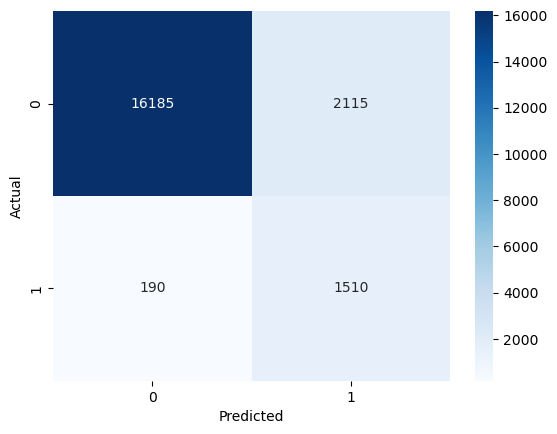

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### EMAIL SPAM DATASET

In [37]:
email_df = pd.read_csv("C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset/emails.csv")
email_df = email_df.drop(columns=["Email No."])
email_df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [38]:
print(email_df.shape)
email_df.info()
print(email_df.isna().sum())

(5172, 3001)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB
the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64


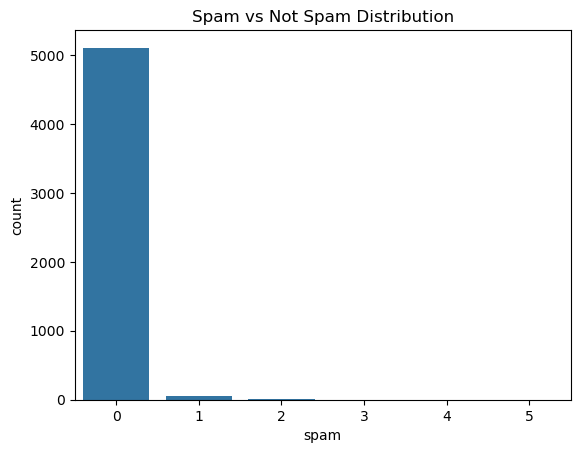

In [39]:
sns.countplot(x="spam", data=email_df)
plt.title("Spam vs Not Spam Distribution")
plt.show()

In [40]:
X = email_df.drop("spam", axis=1)
y = email_df["spam"]

In [41]:
selector = SelectKBest(score_func=f_classif, k=900)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Feature Count:", len(selected_features))

Selected Feature Count: 900


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features],
    y,
    test_size=0.2,
    random_state=42
)

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [44]:
y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9806763285024155

Confusion Matrix:
 [[1007    6   11]
 [   3    8    0]
 [   0    0    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1024
           1       0.57      0.73      0.64        11
           2       0.00      0.00      0.00         0

    accuracy                           0.98      1035
   macro avg       0.52      0.57      0.54      1035
weighted avg       0.99      0.98      0.99      1035



C:\Users\padma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\padma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\padma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


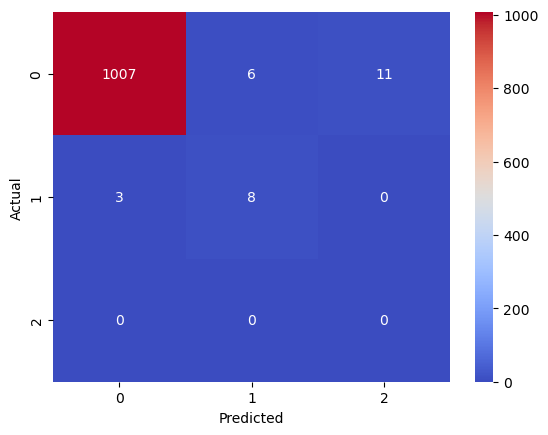

In [45]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="coolwarm"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ENGLISH HANDWRITTEN CHARACTER DATASET

In [46]:
base_path = "C:/Users/padma/Desktop/College/Sem6/ML/a1/Dataset"
csv_path = os.path.join(base_path, "english.csv")

In [47]:
df = pd.read_csv(csv_path)
print(df.head())
print(df.columns)

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
Index(['image', 'label'], dtype='object')


In [48]:
IMG_SIZE = 32
X = []
y = []

for i in range(len(df)):
    img_path = os.path.join(base_path, df.loc[i, "image"])
    label = df.loc[i, "label"]

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    X.append(img)
    y.append(label)


X = np.array(X, dtype="float32") / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [49]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [51]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(y_cat.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

C:\Users\padma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,854 (1.23 MB)

 Trainable params: 321,854 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=32,
    verbose=1
)

Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0163 - loss: 4.1267 - val_accuracy: 0.0476 - val_loss: 4.0916
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0599 - loss: 3.9043 - val_accuracy: 0.1905 - val_loss: 3.5209
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1772 - loss: 3.2648 - val_accuracy: 0.3443 - val_loss: 2.7047
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2811 - loss: 2.6562 - val_accuracy: 0.4652 - val_loss: 2.1987
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3955 - loss: 2.1782 - val_accuracy: 0.5458 - val_loss: 1.7265
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4513 - loss: 1.9568 - val_accuracy: 0.6081 - val_loss: 1.6157
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4961 - loss: 1.7339 - val_accuracy: 0.6264 - val_loss: 1.4334
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5499 - loss: 1.5116 - val_accuracy: 0.6484 - val_loss:

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.6554251909255981


In [54]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


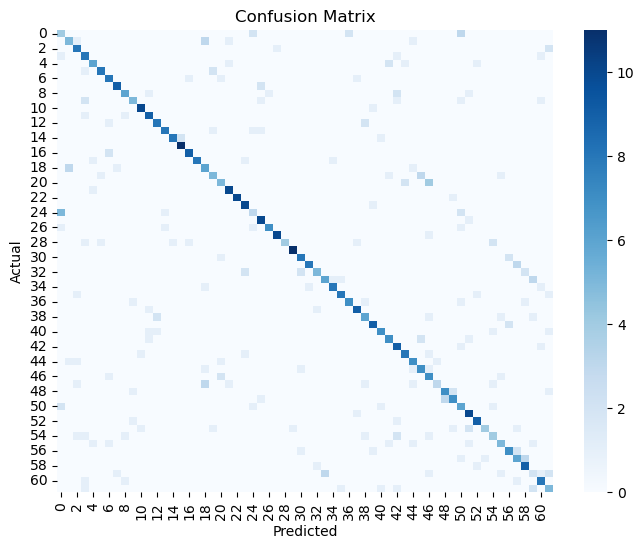

In [55]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [56]:

print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.31      0.36      0.33        11
           1       0.56      0.45      0.50        11
           2       0.62      0.73      0.67        11
           3       0.50      0.73      0.59        11
           4       0.67      0.55      0.60        11
           5       0.80      0.73      0.76        11
           6       0.62      0.73      0.67        11
           7       0.82      0.82      0.82        11
           8       0.67      0.55      0.60        11
           9       0.62      0.45      0.53        11
          10       0.83      0.91      0.87        11
          11       0.69      0.82      0.75        11
          12       0.73      0.73      0.73        11
          13       0.80      0.73      0.76        11
          14       0.89      0.73      0.80        11
          15       0.85      1.00      0.92        11
          16       0.82      0.82      0.82        11
          17       1.00    

### Conclusions:

- Python libraries effectively support data preprocessing, visualization, and model building across different datasets.
- Logistic Regression performed well on structured tabular datasets such as Loan, Iris, and Diabetes.
- Class imbalance influenced evaluation results in medical and spam classification tasks.
- Text and image datasets required more careful preprocessing due to high dimensionality.
- Handwritten character recognition showed moderate accuracy due to many visually similar classes.